#### Кафедра дискретной математики МФТИ

#### Курс математической статистики

Игашов Илья, 593 групппа

#  Задание №8

## №1. 

Сгенерируйте выборку $X_1,\dots,X_{100}$ из распределения $N(0, 1)$. Для каждого $n\leq100$ в модели $N(\theta, 1)$ найдите оценку максимального правдоподобия по выборке $X_1,\dots, X_n$ и байесовскую оценку, для которой в качестве априорного распределения возьмите сопряженное из теоретической задачи $8.3$. Возьмите несколько значений параметров сдвига и масштаба для априорного распределения: $(0, 1), (0, 100), (10, 1), (10, 100)$. Постройте графики абсолютной величины отклонения оценки от истинного значения параметра в зависимости от $n$ для оценки максимального правдоподобия и байесовских оценок, которым соответствуют разные значения параметров априорного распределения ($5$ кривых на одном графике). Сделайте выводы. 

Аналогичные исследования произведите для модели $N(0, \theta)$. В этом случае возьмите следующие параметры для априорного распределения: $(1, 1), (1, 100), (10, 1), (10, 100)$.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

In [20]:
# Установим все параметры и сгенерируем выборку.
N = 100
mean = 0
var = 1
sample = norm.rvs(mean, var, size=N)

### Модель $N(\theta, 1)$

В качестве априорного распределения возьмем сопряженное распределение — $N(\mu, \sigma^2)$ с различными параметрами.

Гиперпараметры апостериорного распределения: $\left(\frac{\mu}{\sigma^2} + \sum_{i=1}^{n}X_i\right) / \left(\frac{1}{\sigma^2} + n\right)$, $\left(\frac{1}{\sigma^2} + n\right)^{-1}$.

Байесовская оценка: $\theta^* = \left(\frac{\mu}{\sigma^2} + \sum_{i=1}^{n}X_i\right) / \left(\frac{1}{\sigma^2} + n\right)$.

Оценка максимального правдоподобия: $\hat\theta = \bar X$.

In [21]:
# Оценка максимального правдоподобия:
likehood = np.array([np.mean(sample[:n]) for n in range(1, N + 1, 1)])

# Байесовские оценки для различных параметров априорного распределения:
params = [[0, 1], [0, 100], [10, 1], [10, 100]]
bayes = np.array([
                np.array([
                        ((np.mean(sample[:n]) * n) + (p[0] / p[1])) / (n + (1 / p[1]))
                        for n in range(1, N + 1, 1)
                    ]) 
                for p in params
            ])

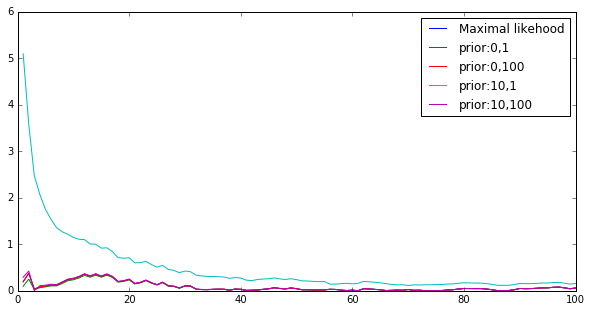

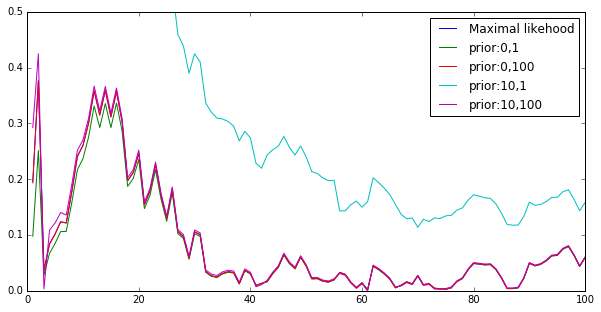

In [26]:
# Графики абсолютного значения отклонения оценок от истинного значения.
grid = np.linspace(1, N, N)
plt.figure(figsize=(10, 5))
plt.plot(grid, abs(likehood - mean), label='Maximal likehood')
i = 0
for estimate in bayes:
    plt.plot(grid, abs(estimate - mean), label=('prior:' + str(params[i][0]) + ',' + str(params[i][1])))
    i += 1

plt.legend()
plt.show()

# В другом масштабе.
plt.figure(figsize=(10, 5))
plt.plot(grid, abs(likehood - mean), label='Maximal likehood')
i = 0
for estimate in bayes:
    plt.plot(grid, abs(estimate - mean), label=('prior:' + str(params[i][0]) + ',' + str(params[i][1])))
    i += 1

plt.ylim(0, 0.5)
plt.legend()
plt.show()

# Вывод

Видим, что поведение трех байесовских оценок очень близко к поведению оценки максимального правдоподобия. Это логично для данных параметров априорного распределения: из формулы для байесовской оценки видно, что $\theta^* \approx \hat\theta$ при $(\mu, \sigma^2)\in\{(0, 1), (0, 100), (10, 100)\}$. Также из графика видно, что байесовская оценка с априорным распределением $N(10, 1)$ хуже остальных оценок.

### Модель $N(0, \theta)$

В качестве априорного распределения возьмем сопряженное распределение — $\Gamma^{-1}(\alpha, \beta)$ с различными параметрами.

Гиперпараметры апостериорного распределения: $\alpha + \frac{n}{2}$, $\beta + \frac{\sum_{i=1}^{n}X_i^2}{2}$.

Байесовская оценка: $\theta^* = \frac{2\beta + \sum_{i=1}^{n}X_i^2}{2\alpha + n - 2}$.

Оценка максимального правдоподобия: $\hat\theta = s^2$.

In [27]:
# Оценка максимального правдоподобия:
likehood = np.array([np.mean((sample ** 2)[:n]) - (np.mean(sample[:n])) ** 2 for n in range(1, N + 1, 1)])

# Байесовские оценки для различных параметров априорного распределения:
params = [[1, 1], [1, 100], [10, 1], [10, 100]]
bayes = np.array([
                np.array([
                        (np.mean((sample ** 2)[:n]) * n + 2 * p[1]) / (n + 2 * p[0] - 2)
                        for n in range(1, N + 1, 1)
                    ]) 
                for p in params
            ])

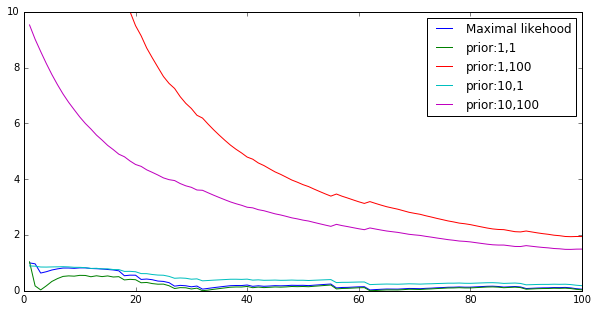

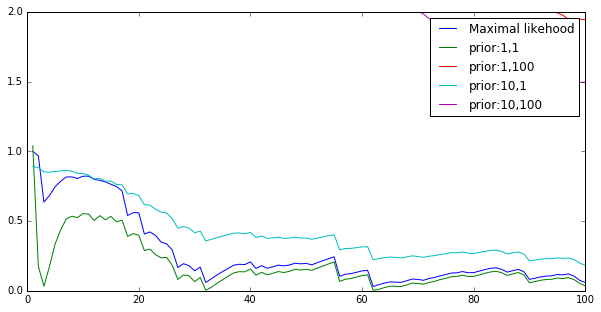

In [31]:
# Графики абсолютного значения отклонения оценок от истинного значения.
grid = np.linspace(1, N, N)
plt.figure(figsize=(10, 5))
plt.plot(grid, abs(likehood - var), label='Maximal likehood')
i = 0
for estimate in bayes:
    plt.plot(grid, abs(estimate - var), label=('prior:' + str(params[i][0]) + ',' + str(params[i][1])))
    i += 1

plt.ylim(0, 10)
plt.legend()
plt.show()

# В другом масштабе.
plt.figure(figsize=(10, 5))
plt.plot(grid, abs(likehood - var), label='Maximal likehood')
i = 0
for estimate in bayes:
    plt.plot(grid, abs(estimate - var), label=('prior:' + str(params[i][0]) + ',' + str(params[i][1])))
    i += 1

plt.ylim(0, 2)
plt.legend()
plt.show()

# Вывод

Из графиков видно, что оценка по методу максимального правдоподобия является далеко не худшим вариантом. Ее превосходит только байесовская оценка с априорным распределением $\Gamma^{-1}(1, 1)$ - она луше всех оценивает дисперсию нормального закона в данном случае. В целом можно сказать, что качество байесовской оценки опрделяется выбором параметров априорного распределния: из графиков видно, что байесовские оценки с разными априорными параметрами по-разному оценивают дисперсию. Есть и плохие оценки (параметры $(1, 100), (10, 100)$), а есть и хорошие.